Pemodelan Pemenang Penghargaan All-NBA Menggunakan *Machine Learning*
---
**Tugas Akhir Mata Kuliah *Reseach and Methodology***

**Dibuat Oleh:**
- Dennis Jonathan (23101910027)

*S1 Business Mathematics 2019 - Universitas Prasetiya Mulya*

## 1. Pendahuluan

### 1.1. Mengimpor *Library* yang Dibutuhkan

In [1]:
# Mengimpor library data processing dan analisis numerik
import pandas as pd
import numpy as np
from data_processing import *

# Mengimpor library untuk membuat grafik
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display_functions import display

# Mengimpor fungsi preprocessing dan oversampling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

# Megimpor library pemodelan Regresi Logistik
import statsmodels.api as sm
from logreg_functions import *

# Mengimpor fungsi pemodelan Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Mengimpor library pemodelan Neural Network
import tensorflow as tf
import tensorflow_addons as tfa
from nn_functions import *

# Mengimpor fungsi untuk mengevaluasi model
from model_evaluation import *

# Mengimpor fungsi untuk tes hipotesa
from scipy.stats import binom_test

# Memedamkan peringatan dari Python
import warnings
warnings.filterwarnings('ignore')

# Setting matplotlib
%matplotlib inline
sns.set_style('whitegrid')

### 1.2. Mengimpor Data *Advanced Statistics* untuk *Training* dan *Development*

In [2]:
# Membaca data advanced statistics masuk ke notebook
raw_data = pd.read_csv('traindev.csv')

# Memperlihatkan 5 data pertama
raw_data.head()

,player,pos,age,tm,g,tmp,per,ts%,3par,ftr,...,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,year
0,Kareem Abdul-Jabbar,C,41,LAL,74,1695,12.9,0.511,0.005,0.250,...,20.1,0.9,2.0,2.9,0.082,-1.9,-0.2,-2.1,0.0,1989
1,Mark Acres,C,26,BOS,62,632,8.2,0.507,0.009,0.421,...,10.4,0.4,0.5,0.9,0.066,-3.0,-0.4,-3.4,-0.2,1989
2,Michael Adams,PG,26,DEN,77,2787,17.5,0.567,0.431,0.363,...,19.7,5.4,2.9,8.3,0.143,2.7,0.2,2.9,3.4,1989
3,Mark Aguirre,SF,29,TOT,80,2597,16.4,0.524,0.137,0.309,...,27.4,2.4,2.1,4.5,0.082,1.4,-1.3,0.1,1.4,1989
4,Danny Ainge,PG,29,TOT,73,2377,18.0,0.554,0.290,0.228,...,22.6,5.2,1.4,6.7,0.135,2.9,-0.4,2.5,2.7,1989


### 1.3. Memunculkan Informasi Mengenai Dataset

In [3]:
# Memunculkan informasi mengenai tipe data kolom dan jumlah data hilang dari data mentah yang dimiliki
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  14838 non-null  object 
 1   pos     14838 non-null  object 
 2   age     14838 non-null  int64  
 3   tm      14838 non-null  object 
 4   g       14838 non-null  int64  
 5   tmp     14838 non-null  int64  
 6   per     14835 non-null  float64
 7   ts%     14791 non-null  float64
 8   3par    14786 non-null  float64
 9   ftr     14786 non-null  float64
 10  orb%    14835 non-null  float64
 11  drb%    14835 non-null  float64
 12  trb%    14835 non-null  float64
 13  ast%    14835 non-null  float64
 14  stl%    14835 non-null  float64
 15  blk%    14835 non-null  float64
 16  tov%    14800 non-null  float64
 17  usg%    14835 non-null  float64
 18  ows     14838 non-null  float64
 19  dws     14838 non-null  float64
 20  ws      14838 non-null  float64
 21  ws/48   14835 non-null  float64
 22

In [4]:
# Melihat dimensi dari data
print(f'Dataset ini memiliki {raw_data.shape[0]} baris dan {raw_data.shape[1]} kolom')

Dataset ini memiliki 14838 baris dan 27 kolom


In [5]:
# Memunculkan persentase data hilang di setiap kolom
(raw_data.isna().sum() / len(raw_data) * 100)[(raw_data.isna().sum() / len(raw_data) * 100)!=0].sort_values(ascending = False)

3par     0.350452
ftr      0.350452
ts%      0.316754
tov%     0.256099
per      0.020218
orb%     0.020218
drb%     0.020218
trb%     0.020218
ast%     0.020218
stl%     0.020218
blk%     0.020218
usg%     0.020218
ws/48    0.020218
dtype: float64

In [6]:
print(f'Jumlah pemain yang tidak memenuhi syarat {raw_data.loc[raw_data["g"]<10].shape[0]}.')

Jumlah pemain yang tidak memenuhi syarat 1245.


### 1.4. Memproses Data

In [7]:
# Menggunakan fungsi process_data untuk memproses data mentah
df = process_data(raw_data, dummies = True, all_nba_dat = 'AllNBA.csv')

# Menunjukan 5 data pertama dari data yang sudah diproses
df.head()

,player,g,tmp,per,ts%,3par,ftr,orb%,drb%,trb%,...,dws,ws,ws/48,obpm,dbpm,bpm,vorp,isAllNBA,pos_F,pos_G
0,Kareem Abdul-Jabbar,74,1695,12.9,0.511,0.005,0.250,7.3,14.2,11.0,...,2.0,2.9,0.082,-1.9,-0.2,-2.1,0.0,0,0,0
1,Mark Acres,62,632,8.2,0.507,0.009,0.421,10.9,15.6,13.3,...,0.5,0.9,0.066,-3.0,-0.4,-3.4,-0.2,0,0,0
2,Michael Adams,77,2787,17.5,0.567,0.431,0.363,2.5,8.3,5.2,...,2.9,8.3,0.143,2.7,0.2,2.9,3.4,0,0,1
3,Mark Aguirre,80,2597,16.4,0.524,0.137,0.309,6.4,10.0,8.3,...,2.1,4.5,0.082,1.4,-1.3,0.1,1.4,0,1,0
4,Danny Ainge,73,2377,18.0,0.554,0.290,0.228,3.3,8.7,6.0,...,1.4,6.7,0.135,2.9,-0.4,2.5,2.7,0,0,1


In [8]:
# Melihat dimensi dari data setelah diproses
print(f'Dataset ini memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

Dataset ini memiliki 13593 baris dan 26 kolom


## 2. Analisis Dasar dan Eksplorasi Data

### 2.1. Korelasi Pearson antar Fitur

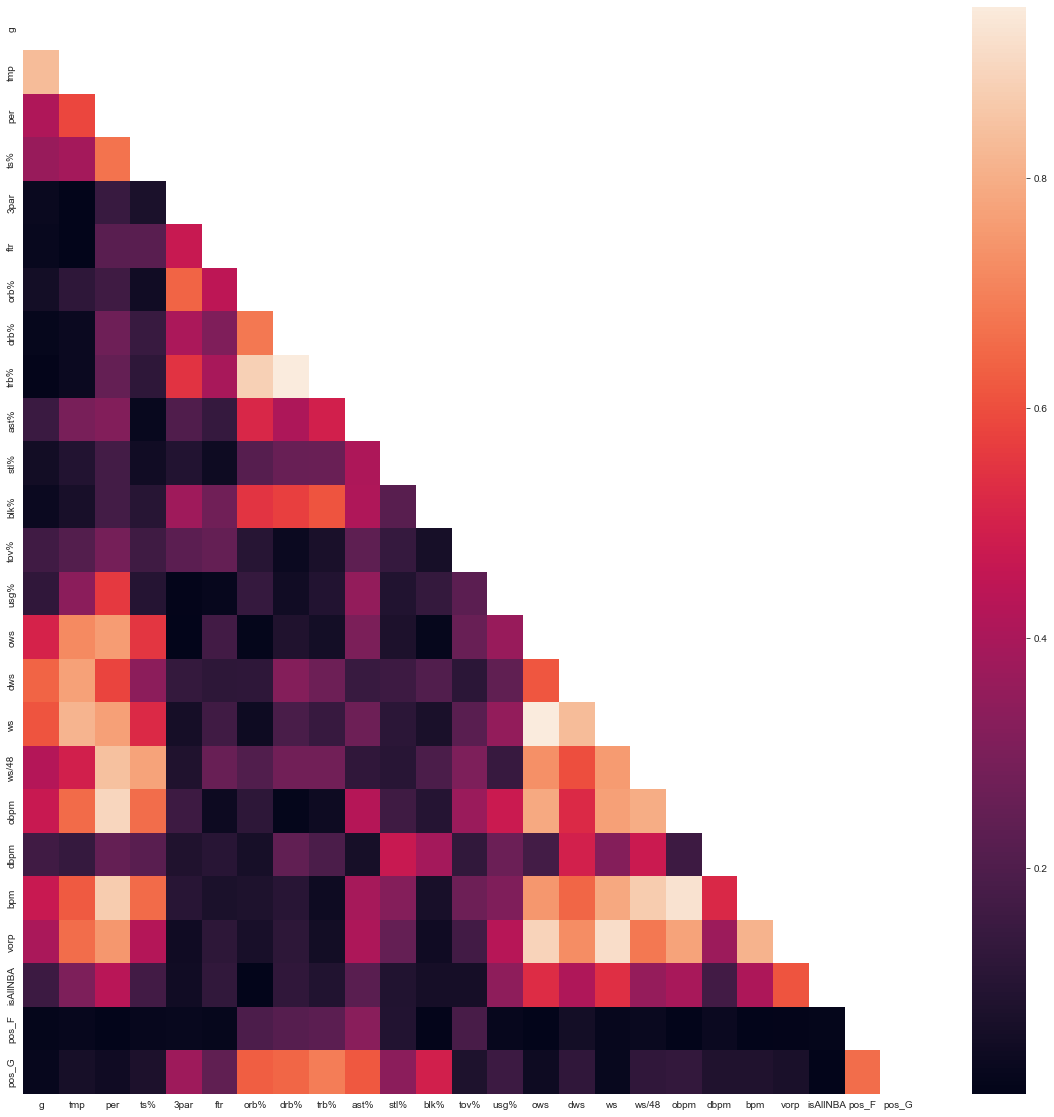

In [9]:
# Membuat figur untuk gambar
plt.figure(figsize = (20, 20))

# Membuat sebuah mask untuk index [i,i]
mask = np.triu(np.ones_like(df.corr().abs(), dtype = np.bool))

# Membuat heatmap dari data
sns.heatmap(df.corr().abs(), annot = False, fmt = '.1%', mask = mask)

# Memunculkan grafik
plt.savefig('Graph\\heatmap.png', transparent = True)
plt.show()

In [10]:
# Mencari korelasi fitur terhadap target
cor = df.corr()['isAllNBA'].abs().drop(['isAllNBA']).to_frame()

# Mencari korelasi tertinggi
top_8 = cor[cor['isAllNBA']>0.35].sort_values(by = 'isAllNBA', ascending = False).round(3) * 100
display(top_8)

# Getting the best 8 features
top_8_cols = top_8.index

,isAllNBA
vorp,61.0
ws,53.7
ows,53.0
per,43.4
dws,41.1
bpm,40.8
obpm,39.6
ws/48,35.5


### 2.2. Statistika Deskriptif

In [11]:
# Memunculkan statistika deskriptif dari pemain yang memenangkan All-NBA
df.loc[df['isAllNBA'] == 1, top_8_cols].describe().round(3)

,vorp,ws,ows,per,dws,bpm,obpm,ws/48
count,495.000,495.000,495.000,495.000,495.000,495.000,495.000,495.000
mean,5.159,11.286,7.327,23.562,3.961,5.497,4.519,0.199
std,1.949,3.130,2.816,3.344,1.557,2.476,2.028,0.045
min,1.300,3.500,1.000,15.900,0.300,-0.400,-0.600,0.070
25%,3.800,9.100,5.500,21.300,2.900,3.700,2.950,0.168
50%,4.900,11.000,7.200,23.300,3.800,5.200,4.400,0.197
75%,6.300,13.200,9.300,25.900,5.000,7.200,5.900,0.226
max,11.800,20.400,14.900,31.900,9.100,13.200,10.300,0.322


In [12]:
# Memunculkan statistika deskriptif dari pemain yang tidak memenangkan All-NBA
df.loc[df['isAllNBA'] == 0, top_8_cols].describe().round(3)

,vorp,ws,ows,per,dws,bpm,obpm,ws/48
count,13098.000,13098.000,13098.000,13098.000,13098.000,13098.000,13098.000,13098.000
mean,0.523,2.565,1.276,12.887,1.288,-1.524,-1.377,0.077
std,1.084,2.544,1.766,4.177,1.091,2.961,2.577,0.061
min,-2.600,-2.100,-3.300,-9.100,-1.000,-23.200,-17.200,-0.352
25%,-0.200,0.500,0.000,10.300,0.400,-3.200,-2.900,0.043
50%,0.100,1.900,0.700,12.900,1.000,-1.400,-1.300,0.081
75%,1.000,4.000,2.100,15.600,1.900,0.400,0.300,0.116
max,7.400,14.900,11.700,32.400,8.000,10.000,8.600,0.345


### 2.3. Distribusi Fitur

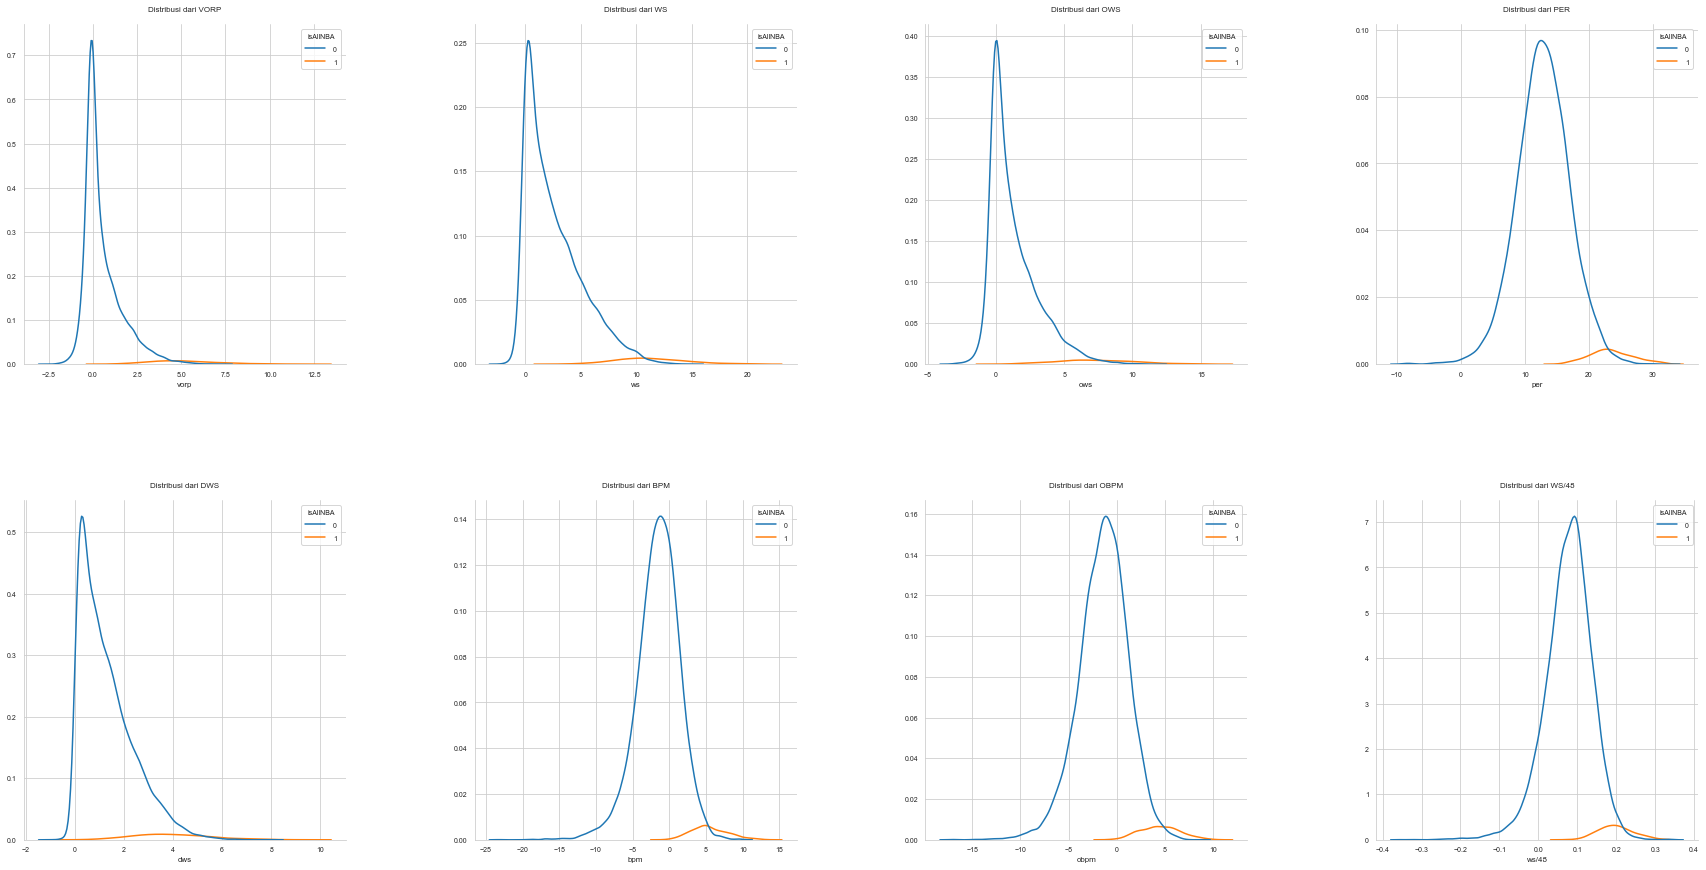

In [13]:
# Membuat subplot
plt.subplots(2, 4, figsize = (30, 15))

# Melakukan loop untuk kolom yang memiliki 8 korelasi tertinggi
for n, col in enumerate(top_8_cols):
    # Mengatur posisi grafik
    plt.subplot(2, 4, n+1)

    # Membuat Kernel Density Estimate plot
    dis_plot = sns.kdeplot(df[col], hue = df['isAllNBA'])

    # Pengaturan plot
    plt.setp(dis_plot.get_legend().get_texts(), fontsize = '7')
    plt.setp(dis_plot.get_legend().get_title(), fontsize = '7')
    plt.setp(dis_plot.get_xticklabels(), fontsize = '7')
    plt.setp(dis_plot.get_yticklabels(), fontsize = '7')
    plt.ylabel(None)
    plt.xlabel(col, fontsize = 8)
    plt.title(f'Distribusi dari {str.upper(col)}',fontsize = 8, y = 1.02)
    sns.despine()

# Mengatur jarak antar subplot
plt.subplots_adjust(wspace = 0.4,hspace = 0.4)

# Memunculkan grafik
plt.savefig('Graph\\distplot.png', transparent = True)
plt.show()

## 3. Pemodelan

### 3.1. Preparasi Data untuk Pemodelan

In [14]:
# Menentukan kolom target dan fitur
target = ['isAllNBA']
feature = df.select_dtypes(np.number).columns.drop([target[0]])

# Membagi dataset menjadi training dan dev set
X_train, X_dev, y_train, y_dev = train_test_split(df[feature],
                                                  df[target],
                                                  test_size = 0.25,
                                                  random_state = 0,
                                                  stratify = df[target])

In [15]:
# Melakukan scaling data
X_train, scale = initial_scaler(X_train, exclude = ['pos_G', 'pos_F'])
X_dev = scaler(scale, X_dev, exclude = ['pos_G', 'pos_F'])

In [16]:
# Melakukan oversampling
oversample = SMOTENC(random_state = 0, categorical_features = [22, 23])
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

### 3.2. Pemodelan dengan Regresi Logistik

#### 3.2.1. Pengecekan Multikolinearitas Fitur

In [17]:
# Menggunakan calc_vif untuk mencari multikolinearitas di data
calc_vif(df.select_dtypes(include = np.number).drop([target[0]], axis = 1)).sort_values(by = 'VIF', ascending = False).reset_index(drop = True)

,Var,VIF
0,trb%,8909.834730
1,ws,7140.244053
2,bpm,4823.541760
3,drb%,4353.366512
4,obpm,3677.105794
5,ows,2770.349295
6,dws,1386.191956
7,orb%,933.551922
8,per,743.614103
9,dbpm,628.136906


In [18]:
# Menggunakan fungsi clean_vif untuk mencari kolom-kolom yang memiliki VIF <= 5
col_clean_vif = clean_vif(df.select_dtypes(include = np.number).drop([target[0]], axis = 1), 5)

# Memperlihatkan hasilnya
col_clean_vif

0     3par
1      ftr
2     ast%
3     blk%
4      ows
5      dws
6     obpm
7     dbpm
8    pos_F
Name: Var, dtype: object

#### 3.2.2. Pemodelan dengan Fitur yang Signifikan

In [19]:
# Menggunakan fungsi p_eliminate untuk mencari kolom yang signifikan
selected_col = p_eliminate(X_train_smote[col_clean_vif], y_train_smote)

,Var,p_val
0,3par,2.482631e-34
1,ftr,1.058293e-08
2,ast%,3.261948e-03
3,blk%,3.491120e-03
4,ows,3.979462e-03
5,dws,3.457929e-184
6,obpm,1.081093e-185
7,dbpm,2.449640e-41
8,pos_F,1.607892e-03


In [20]:
# Menambahkan konstan ke dataset
X_train_smote_logreg = sm.add_constant(X_train_smote)
X_train_logreg = sm.add_constant(X_train)
X_dev_logreg = sm.add_constant(X_dev)

# Memilih kolom-kolom yang memiliki p-value lebih kecil atau sama dengan 0.05
X_train_smote_logreg_sel = X_train_smote_logreg[selected_col + ['const']]
X_train_logreg_sel = X_train_logreg[selected_col + ['const']]
X_dev_logreg_sel = X_dev_logreg[selected_col + ['const']]

# Pemodelan menggunakan Regresi Logistik
logreg = sm.Logit(y_train_smote[target[0]], X_train_smote_logreg_sel).fit(disp = False)

# Memunculkan ringkasan model
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               isAllNBA   No. Observations:                19646
Model:                          Logit   Df Residuals:                    19636
Method:                           MLE   Df Model:                            9
Date:                Wed, 25 May 2022   Pseudo R-squ.:                  0.8437
Time:                        16:26:32   Log-Likelihood:                -2128.2
converged:                       True   LL-Null:                       -13618.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
3par          -0.9289      0.076    -12.218      0.000      -1.078      -0.780
ftr            0.3525      0.062      5.721      0.000       0.232       0.473
ast%           0.1648      0.056      2.942      0.003       0.055       0.275
blk%           0.2121      0.073      2.921      0.003       0.070       0.354
ows            0.1899      0.066      2.880      0.004       0.061       0.319
dws            2.0140      0.070     28.943      0.000       1.878       2.150
obpm           4.1413      0.142     29.062      0.000       3.862       4.421
dbpm          -1.1020      0.082    -13.467      0.000      -1.262      -0.942
pos_F         -0.3089      0.098     -3.154      0.002      -0.501      -0.117
const         -7.6295      0.182    -41.890      0.000      -7.986      -7.273
==============================================================================

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### 3.2.3. Evaluasi Data *Training*

In [21]:
# Mencari threshold probabilitas terbaik untuk Regresi Logistik
logreg_threshold = optimal_threshold(y_dev[target[0]], logreg.predict(X_dev_logreg_sel), n_candidates = 30, metric = 'f1', bound = (70,99))

Threshold terbaik adalah 0.94 dengan skor f1 78.39999999999999%


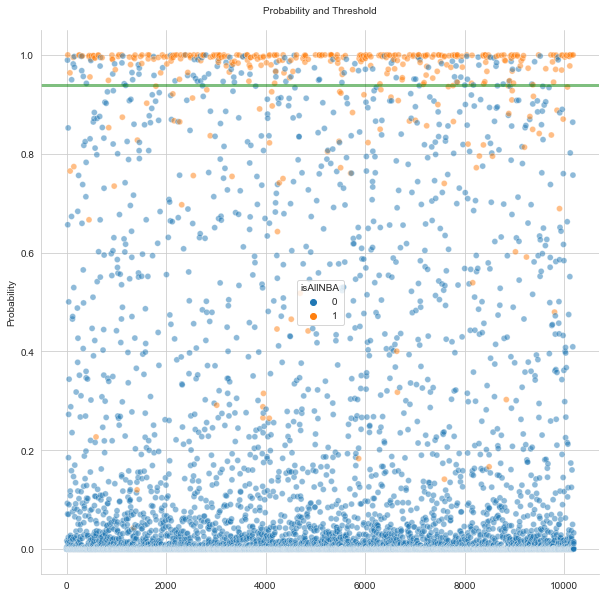

In [22]:
# Plotting hasil proabilitas data training
prob_threshold_plot(logreg.predict(X_train_logreg_sel), hue_tar = y_train['isAllNBA'],
                    threshold = logreg_threshold, save_name = 'logreg_train_thres')

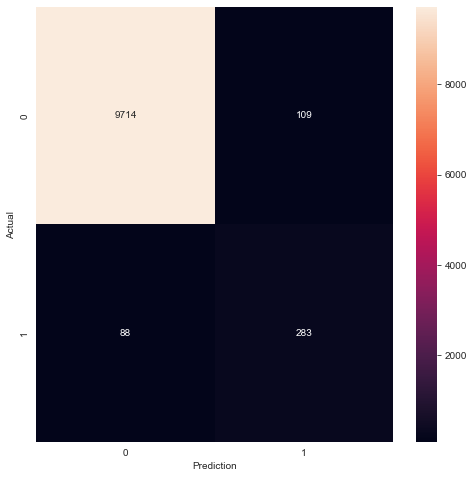

In [23]:
# Menggunakan threshold yang ditentukan untuk membulatkan probabilitas training
logreg_train_result = np.where(logreg.predict(X_train_logreg_sel) > logreg_threshold, 1, 0)

# Menampilkan heatmap dari confusion matrix
cm_heatmap(y_train[target[0]], logreg_train_result, save_name = 'logreg_train_cm')

In [24]:
# Mengkalkulasi metrik dari probabilitas training
logreg_train_metrics = eval_metrics(y_train[target[0]], logreg_train_result)

# Menunjukan metrik-metrik evaluasi
logreg_train_metrics

{'tp': 283,
 'tn': 9714,
 'fn': 88,
 'fp': 109,
 'accuracy': 0.9806749068079262,
 'recall': 0.7628032345013477,
 'precision': 0.7219387755102041,
 'f1': 0.7418086500655309}

#### 3.2.4. Evaluasi Data *Development*

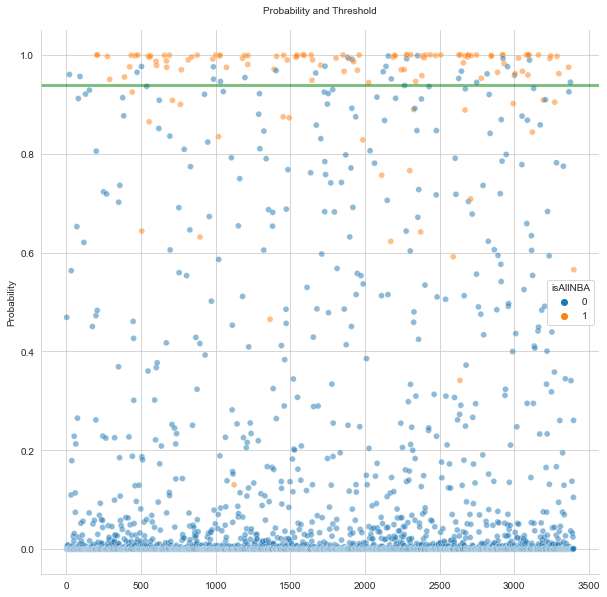

In [25]:
# Plotting hasil proabilitas data development
prob_threshold_plot(logreg.predict(X_dev_logreg_sel), hue_tar = y_dev['isAllNBA'],
                    threshold = logreg_threshold, save_name = 'logreg_dev_thres')

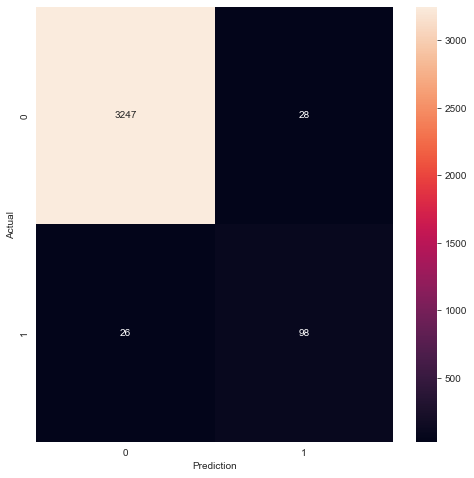

In [26]:
# Membulatkan prediksi data Development dengan threshold yang optimal
logreg_dev_result = np.where(logreg.predict(X_dev_logreg_sel) > logreg_threshold, 1, 0)

# Membuat heatmap dari confusion matrix
cm_heatmap(y_dev[target[0]], logreg_dev_result, save_name = 'logreg_dev_cm')

In [27]:
# Mengkalkulasikan metrik model dengan hasil prediksi data development
logreg_dev_metrics = eval_metrics(y_dev[target[0]], logreg_dev_result)

# Menunjukan hasil metrik dari model
logreg_dev_metrics

{'tp': 98,
 'tn': 3247,
 'fn': 26,
 'fp': 28,
 'accuracy': 0.9841129744042365,
 'recall': 0.7903225806451613,
 'precision': 0.7777777777777778,
 'f1': 0.7839999999999999}

### 3.3. Pemodelan dengan *Random Forest*

#### 3.3.1. Mencari Hyperparameter terbaik untuk *Random Forest*

In [28]:
# # Mendefinisikan dictionary untuk hyperparameter yang akan dicari
# hyperparameter = {
#     'n_estimators': np.linspace(1, 100, 100, dtype = int).tolist(),
#     'criterion': ('gini', 'entropy'),
#     'max_leaf_nodes': list(range(2, 100)),
#     'min_samples_split': [2, 3, 4]
# }
#
# # Menggunakan random searching untuk mencari hyperparameter terbaik
# rf = RandomizedSearchCV(RandomForestClassifier(random_state = 0),
#                         hyperparameter,
#                         n_iter = 100,
#                         scoring = 'f1',
#                         cv = 3,
#                         random_state = 0,
#                         verbose = 2,
#                         n_jobs = 20)
#
# # Melakukan fitting terhadap data training
# rf.fit(X_train_smote, y_train_smote)

In [29]:
# # Menampilkan skor terbaik dan parameter terbaik
# print(f'Skor F1 terbaik adalah {rf.best_score_} '
#       f'dengan hyperparameter terbaik {rf.best_params_["n_estimators"]} estimator, kriteria {rf.best_params_["criterion"]}, '
#       f'minimum sampel dalam node untuk split {rf.best_params_["min_samples_split"]}, maximum leaf nodes {rf.best_params_["max_leaf_nodes"]}.')

In [30]:
rf = RandomForestClassifier(n_estimators = 96, criterion = 'entropy', min_samples_split = 3, max_leaf_nodes = 95, random_state = 0)

rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=95,
                       min_samples_split=3, n_estimators=96, random_state=0)

In [31]:
# Menunjukan peranan dari fitur yang digunakan
pd.DataFrame(rf.feature_importances_, index = df[feature].columns, columns = ['feature']).sort_values(by = 'feature', ascending = False)

,feature
vorp,0.191049
per,0.136203
ws,0.130625
obpm,0.099788
bpm,0.094639
usg%,0.064049
ows,0.061054
ws/48,0.054331
tmp,0.041113
dws,0.029875


#### 3.3.2. Evaluasi Data *Training*

In [32]:
# Mencari threshold probabilitas terbaik untuk model Random Forest
rf_threshold = optimal_threshold(y_dev[target[0]], rf.predict_proba(X_dev)[:, 1], n_candidates = 30, metric = 'f1', bound = (70,99))

Threshold terbaik adalah 0.7 dengan skor f1 80.45112781954887%


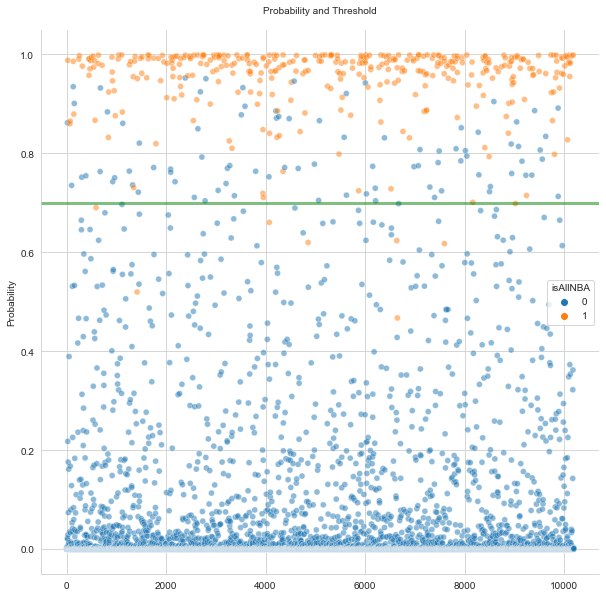

In [33]:
# Plotting hasil proabilitas data training
prob_threshold_plot(rf.predict_proba(X_train)[:, 1], hue_tar = y_train['isAllNBA'],
                    threshold = rf_threshold, save_name = 'rf_train_thres')

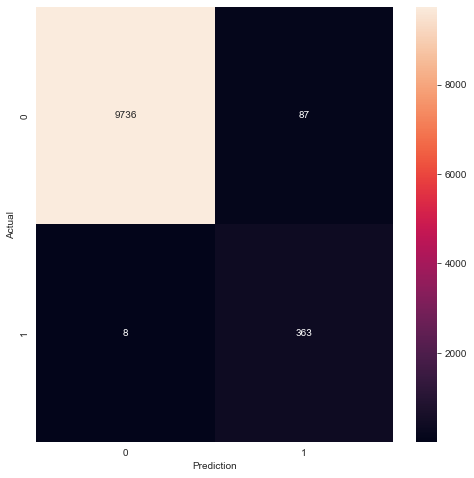

In [34]:
# Menggunakan threshold yang ditentukan untuk membulatkan probabilitas training
rf_train_result = np.where(rf.predict_proba(X_train)[:, 1] > rf_threshold, 1, 0)

# Menampilkan heatmap dari confusion matrix
cm_heatmap(y_train[target[0]], rf_train_result, save_name = 'rf_train_cm')

In [35]:
# Mengkalkulasi metrik dari probabilitas training
rf_train_metrics = eval_metrics(y_train[target[0]], rf_train_result)

# Menunjukan metrik-metrik evaluasi
rf_train_metrics

{'tp': 363,
 'tn': 9736,
 'fn': 8,
 'fp': 87,
 'accuracy': 0.9906807926231116,
 'recall': 0.9784366576819407,
 'precision': 0.8066666666666666,
 'f1': 0.884287454323995}

#### 3.3.3. Evaluasi Data *Development*

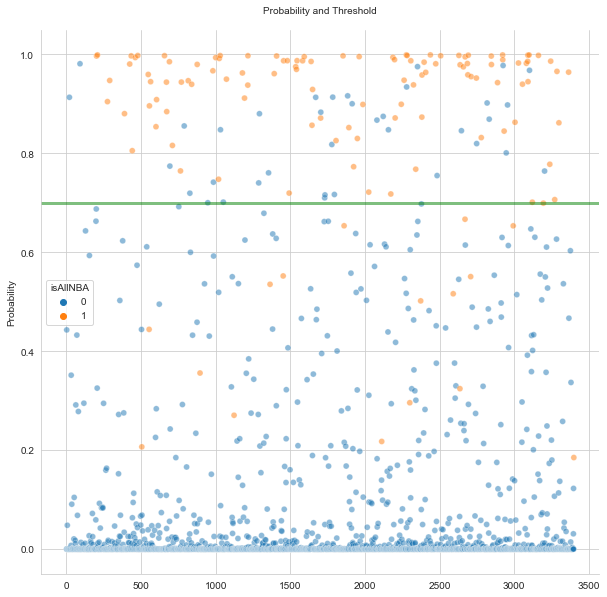

In [36]:
# Plotting hasil proabilitas data development
prob_threshold_plot(rf.predict_proba(X_dev)[:, 1], hue_tar = y_dev['isAllNBA'],
                    threshold = rf_threshold, save_name = 'rf_dev_thres')

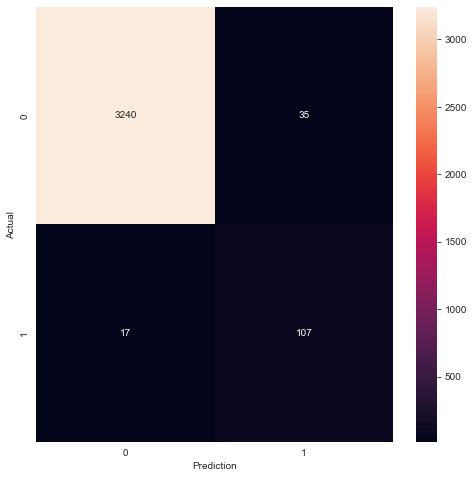

In [37]:
# Membulatkan prediksi data Development dengan threshold yang optimal
rf_dev_result = np.where(rf.predict_proba(X_dev)[:, 1] > rf_threshold, 1, 0)

# Membuat heatmap dari confusion matrix
cm_heatmap(y_dev[target[0]], rf_dev_result, save_name = 'rf_dev_cm')

In [38]:
# Mengkalkulasikan metrik model dengan hasil prediksi data development
rf_dev_metrics = eval_metrics(y_dev[target[0]], rf_dev_result)

# Menunjukan hasil metrik dari model
rf_dev_metrics

{'tp': 107,
 'tn': 3240,
 'fn': 17,
 'fp': 35,
 'accuracy': 0.9847013827596351,
 'recall': 0.8629032258064516,
 'precision': 0.7535211267605634,
 'f1': 0.8045112781954887}

### 3.4. Pemodelan dengan *Neural Network*

#### 3.4.1. Melakukan Pemodelan *Neural Network*

In [39]:
# model_tf(X_train_smote, y_train_smote, X_dev, y_dev, epoch=200, threshold=0.9, savefile='Classifier.h5')

In [40]:
# Memasukan model yang diinginkan kembali ke notebook
nn = tf.keras.models.load_model('Classifier.h5')

# Memunculkan summary dari model yang dimasukan
nn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 256)          6400        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 256)         1024        ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 256)          0           ['batch_normalization[0][0]']

In [41]:
# Menampilkan grafik progresi pelatihan
Image('History.png')

#### 3.4.4. Evaluasi Data *Training*

In [42]:
# Mencari threshold probabilitas terbaik untuk model Neural Network
nn_threshold = optimal_threshold(y_dev[target[0]], nn.predict(X_dev).reshape((-1,)), n_candidates = 30, metric = 'f1', bound = (70,99))

Threshold terbaik adalah 0.94 dengan skor f1 82.45614035087719%


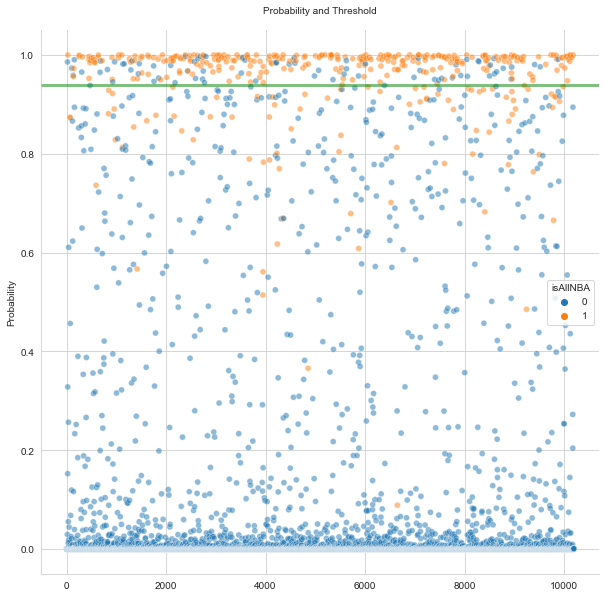

In [43]:
# Plotting hasil proabilitas data training
prob_threshold_plot(nn.predict(X_train).reshape((-1,)), hue_tar = y_train[target[0]],
                    threshold = nn_threshold, save_name = 'nn_train_thres')

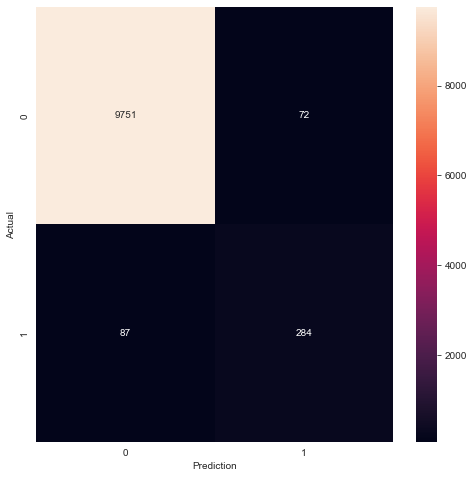

In [44]:
# Menggunakan threshold yang ditentukan untuk membulatkan probabilitas training
nn_train_result = np.where(nn.predict(X_train).reshape((-1,)) > nn_threshold, 1, 0)

# Menampilkan heatmap dari confusion matrix
cm_heatmap(y_train[target[0]], nn_train_result, save_name = 'nn_train_cm')

In [45]:
# Mengkalkulasi metrik dari probabilitas training
nn_train_metrics = eval_metrics(y_train[target[0]], nn_train_result)

# Menunjukan metrik-metrik evaluasi
nn_train_metrics

{'tp': 284,
 'tn': 9751,
 'fn': 87,
 'fp': 72,
 'accuracy': 0.9844025897586816,
 'recall': 0.7654986522911051,
 'precision': 0.797752808988764,
 'f1': 0.781292984869326}

#### 3.4.5. Evaluasi Data *Development*

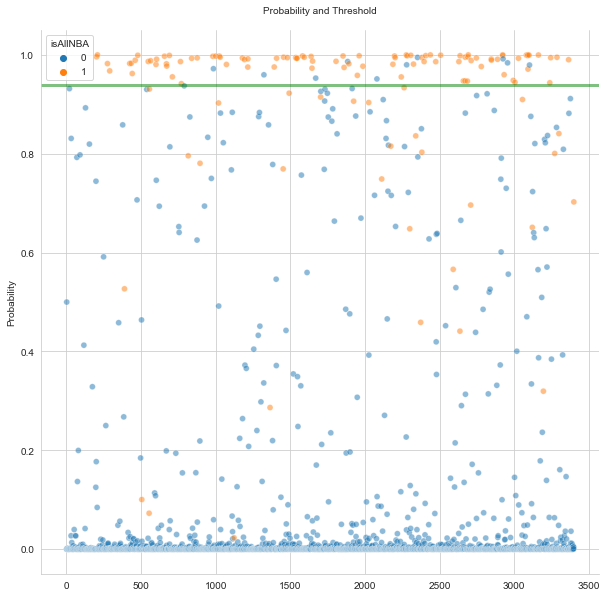

In [46]:
# Plotting hasil proabilitas data development
prob_threshold_plot(nn.predict(X_dev).reshape((-1,)), hue_tar = y_dev[target[0]],
                    threshold = nn_threshold, save_name = 'nn_dev_thres')

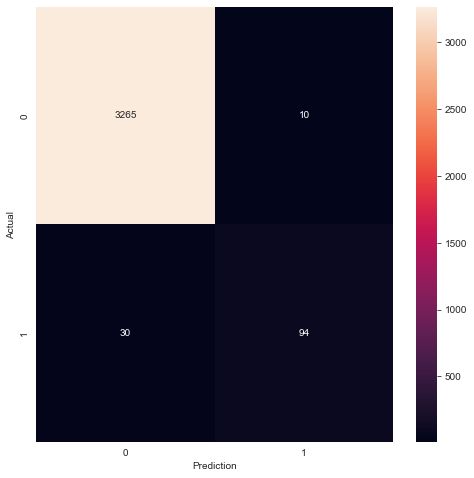

In [47]:
# Membulatkan prediksi data Development dengan threshold yang optimal
nn_dev_result = np.where(nn.predict(X_dev).reshape((-1,)) > nn_threshold, 1, 0)

# Membuat heatmap dari confusion matrix
cm_heatmap(y_dev[target[0]], nn_dev_result, save_name = 'nn_dev_cm')

In [48]:
# Mengkalkulasikan metrik model dengan hasil prediksi data development
nn_dev_metrics = eval_metrics(y_dev[target[0]], nn_dev_result)

# Menunjukan hasil metrik dari model
nn_dev_metrics

{'tp': 94,
 'tn': 3265,
 'fn': 30,
 'fp': 10,
 'accuracy': 0.9882318328920271,
 'recall': 0.7580645161290323,
 'precision': 0.9038461538461539,
 'f1': 0.8245614035087719}

## 4. Perbandingan Model

In [49]:
# Membuat dataframe dari semua metrik yang sudah dihitung
compare = create_compare_frame([logreg_train_metrics, rf_train_metrics, nn_train_metrics], [logreg_dev_metrics, rf_dev_metrics, nn_dev_metrics])

# Memunculkan dataframe yang dibuat
compare

,model,tp,tn,fn,fp,accuracy,recall,precision,f1,dataset
0,logistic regression,283,9714,88,109,0.980675,0.762803,0.721939,0.741809,train
1,random forest,363,9736,8,87,0.990681,0.978437,0.806667,0.884287,train
2,neural network,284,9751,87,72,0.984403,0.765499,0.797753,0.781293,train
3,logistic regression,98,3247,26,28,0.984113,0.790323,0.777778,0.784000,dev
4,random forest,107,3240,17,35,0.984701,0.862903,0.753521,0.804511,dev
5,neural network,94,3265,30,10,0.988232,0.758065,0.903846,0.824561,dev


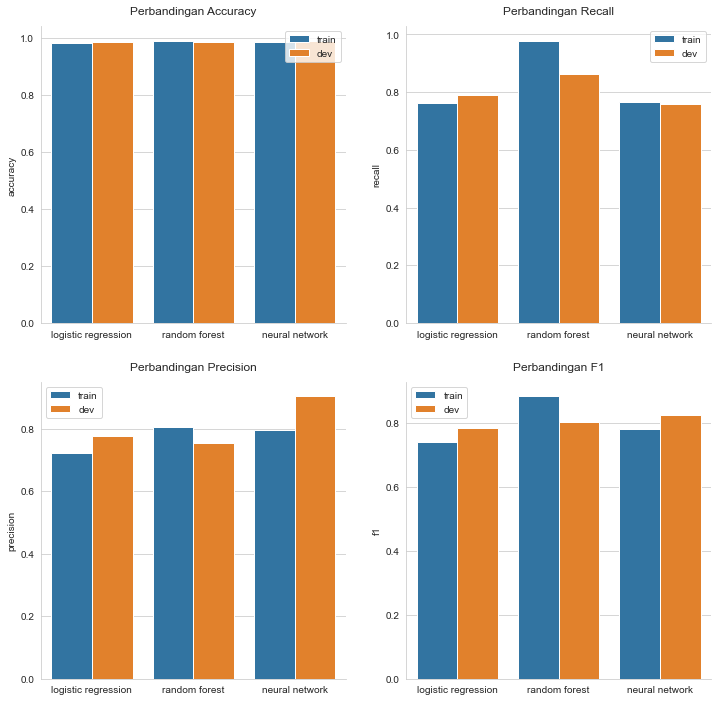

In [50]:
# Membuat 4 subplot
plt.subplots(2, 2, figsize = (12, 12))

# Melakukan looping untuk metrik yang diinginkan
for n, metric in enumerate(['accuracy', 'recall', 'precision', 'f1']):
    # Mengatur agar grafik sesuai dengan subplot yang kosong
    plt.subplot(2, 2, n+1)
    # Membuat grafik bar untuk metrik yang diinginkan
    sns.barplot(x = 'model', y = metric, hue = 'dataset', data = compare)
    # Pengaturan grafik
    plt.title(f'Perbandingan {str.title(metric)}', y = 1.02)
    plt.ylabel(metric)
    plt.xlabel('')
    plt.legend()
    sns.despine()

# Menunjukan plot
plt.savefig('Graph\\comparison.png', transparent = True)
plt.show()

## 5. Uji Hipotesa

In [51]:
# Melakukan uji hipotesa dengan model terbaik
binom_test(nn_dev_metrics['accuracy'] * len(y_dev), n = len(y_dev), p = 0.5)

0.0

## 6. Menggunakan Model-Model untuk Memprediksi Pemenang Tahun 2021-2022

In [52]:
# Mengimpor data testing
raw_test = pd.read_csv('test.csv')

# Memunculkan 5 data pertama dari data mentah
raw_test.sample(10, random_state = 0)

,player,pos,age,tm,g,tmp,per,ts%,3par,ftr,...,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,year
573,Paul Watson,SF,27,OKC,9,156,5.7,0.432,0.743,0.057,...,11.0,-0.1,0.1,0.0,0.001,-4.8,-0.6,-5.4,-0.1,2022
52,Keljin Blevins,SF,26,POR,31,349,4.8,0.410,0.649,0.099,...,16.5,-0.6,0.1,-0.5,-0.066,-5.6,-2.9,-8.5,-0.6,2022
528,Emanuel Terry,PF,25,PHO,3,18,-0.1,0.000,0.000,0.000,...,23.9,-0.1,0.0,-0.1,-0.256,-13.0,-5.3,-18.3,-0.1,2022
343,Théo Maledon,PG,20,OKC,51,908,10.6,0.500,0.473,0.315,...,20.3,-0.5,0.8,0.3,0.015,-3.7,-0.7,-4.4,-0.6,2022
55,Bol Bol,PF,22,DEN,14,81,13.5,0.565,0.148,0.185,...,18.0,0.0,0.1,0.1,0.065,-0.5,-0.4,-1.0,0.0,2022
62,Avery Bradley,SG,31,LAL,62,1406,7.8,0.550,0.600,0.051,...,12.1,0.3,0.9,1.2,0.040,-3.5,-0.1,-3.6,-0.6,2022
346,Tre Mann,PG,20,OKC,60,1367,10.2,0.501,0.463,0.139,...,22.0,-1.0,1.0,0.1,0.002,-3.3,-1.1,-4.3,-0.8,2022
304,Braxton Key,SF,24,TOT,11,197,13.7,0.508,0.292,0.181,...,19.4,-0.1,0.3,0.2,0.052,-3.8,0.6,-3.3,-0.1,2022
206,Javonte Green,SF,28,CHI,65,1519,14.0,0.637,0.311,0.295,...,11.5,2.9,1.5,4.4,0.139,-0.6,0.7,0.1,0.8,2022
405,Aaron Nesmith,SF,22,BOS,52,574,7.3,0.507,0.632,0.143,...,17.2,-0.4,0.9,0.4,0.038,-4.9,0.7,-4.3,-0.3,2022


In [53]:
# Memproses data testing
test = process_data(raw_test, dummies = False)

# Melakukan scaling ke kolom-kolom yang diinginkan di data testing
test_to_pred = process_data(raw_test, dummies = True)
test_to_pred = scaler(scale, test_to_pred, exclude = ['pos_G', 'pos_F'])

In [54]:
# Memprediksi data testing menggunakan Regresi Logistik
test['logreg_prob'] = logreg.predict(sm.add_constant(test_to_pred[selected_col]))

# Memprediksi data testing menggunakan Random Forest
test['rf_prob'] = rf.predict_proba(test_to_pred[feature])[:, 1]

# Memprediksi data testing menggunakan Neural Network
test['nn_prob'] = nn.predict(test_to_pred[feature])

In [55]:
# Memilih 15 pemain All-NBA sesuai dengan aturan pilih
select_all_nba(test, 'nn_prob')

,player,pos,nn_prob
0,Luka Dončić,G,0.991841
1,Trae Young,G,0.985421
2,Stephen Curry,G,0.967980
3,Devin Booker,G,0.965536
4,Ja Morant,G,0.961248
5,Donovan Mitchell,G,0.950246
6,Giannis Antetokounmpo,F,0.995235
7,Jayson Tatum,F,0.990297
8,Kevin Durant,F,0.969836
9,LeBron James,F,0.959276
